In [0]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import statistics
import seaborn as sns

In [2]:
#1.Загрузить файл hr.csv.
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
#среднее,медиана,мода,мин/макс,сред.отклонение
hr = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/HR.csv')

hr.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:

cols = list(hr.columns.values)

print('Значение моды для:')
        
for x in (cols):
  try:
    print(x, ' = ', statistics.mode(hr[x]))
  except:
    print(x, ' мода не определена')



Значение моды для:
satisfaction_level  =  0.1
last_evaluation  =  0.55
number_project  =  4
average_montly_hours  мода не определена
time_spend_company  =  3
Work_accident  =  0
left  =  0
promotion_last_5years  =  0
sales  =  sales
salary  =  low


In [5]:
#Рассчитать и визуализировать корреляционную матрицу для переменных.
correlation_matrix = hr.corr(method ='pearson').round(2)
correlation_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


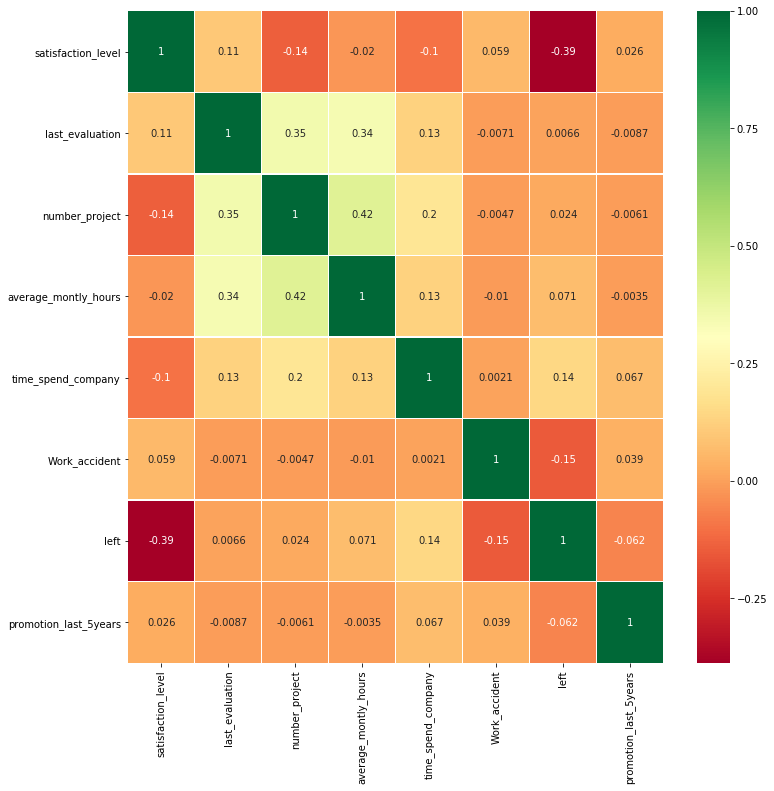

In [0]:
sns.heatmap(hr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()


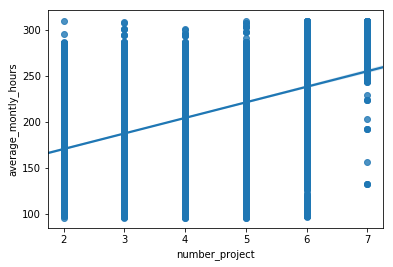

In [0]:
#Визуализировать несколько взаимосвязей между переменными.

number_project = hr['number_project']
average_montly_hours = hr['average_montly_hours']
sns.regplot(x= number_project, y=average_montly_hours)


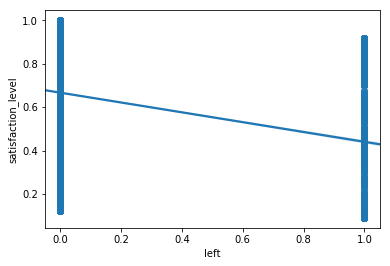

In [0]:

satisfaction_level = hr['satisfaction_level']
left = hr['left']
sns.regplot(x=left, y=satisfaction_level)


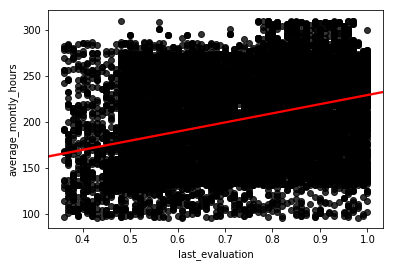

In [0]:
#fig, ax = plt.subplots()

last_evaluation  = hr['last_evaluation']
average_montly_hours = hr['average_montly_hours']
sns.regplot(x=last_evaluation, y=average_montly_hours,scatter_kws={"color": "black"}, line_kws={"color": "red"})


In [6]:
# С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

average_montly_hours_promotion_1 = hr[hr['promotion_last_5years']==1]['average_montly_hours'] 
average_montly_hours_promotion_0 = hr[hr['promotion_last_5years']==0]['average_montly_hours']

stats.ttest_ind(average_montly_hours_promotion_1, average_montly_hours_promotion_0)

# pvalue=0.66 
# если принять пороговое значение pvalue =0,05 для полтверждения статистически значимой разницы между
# 2-мя средними выборок по средн кол-ву отработанных часов то полученного значения для этого не достаточно. 

Ttest_indResult(statistic=-0.43405963706693557, pvalue=0.6642513790482909)

In [0]:

satisfaction_level_low_salary = hr[hr['salary']=='low']['satisfaction_level'] 
satisfaction_level_medium_salary = hr[hr['salary']=='low']['satisfaction_level']
satisfaction_level_high_salary = hr[hr['salary']=='high']['satisfaction_level']


stats.f_oneway(satisfaction_level_low_salary, satisfaction_level_medium_salary, satisfaction_level_high_salary)

# По полученному значению pvalue можно сделать вывод о наличии взаимосвязи между salary и satisfaction_level

F_onewayResult(statistic=12.054922659254595, pvalue=5.869314882039814e-06)

In [0]:
# Рассчитать сколько работников работает в каждом департаменте.

hr.groupby('sales')['sales'].value_counts()

sales        sales      
IT           IT             1227
RandD        RandD           787
accounting   accounting      767
hr           hr              739
management   management      630
marketing    marketing       858
product_mng  product_mng     902
sales        sales          4140
support      support        2229
technical    technical      2720
Name: sales, dtype: int64

In [10]:
# Показать распределение сотрудников по зарплатам.

hr.groupby(['salary']).count()['satisfaction_level']

#sales = hr[hr.sales == 'sales']
#len(sales)

salary
high      1237
low       7316
medium    6446
Name: satisfaction_level, dtype: int64

In [11]:
# Показать распределение сотрудников по зарплатам совместно с департаментами

hr.groupby(['sales', 'salary']).count().reset_index()[['sales', 'salary','satisfaction_level']]

,sales,salary,satisfaction_level
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


In [17]:
# Сколько сотрудников покинули компанию.
len(hr[hr['left']==1])

3571

In [19]:
# Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

hs_left_1 = hr[hr['left']==1]['Work_accident'] 
hs_left_0 = hr[hr['left']==0]['Work_accident']

stats.ttest_ind(hs_left_1, hs_left_0)

# подтвердлаем гипотезу по наличию происшествий (точнее есть взаимосвязь)

Ttest_indResult(statistic=-19.165804033090176, pvalue=6.613049400453939e-81)

In [22]:
hs_left_1 = hr[hr['left']==1]['promotion_last_5years'] 
hs_left_0 = hr[hr['left']==0]['promotion_last_5years']

stats.ttest_ind(hs_left_1, hs_left_0)

# подтвердлаем гипотезу по promotion_last_5years (точнее есть взаимосвязь)

Ttest_indResult(statistic=-7.581195349367637, pvalue=3.624047224146943e-14)

In [26]:
hs_left_1 = hr[hr['left']==1]['last_evaluation'] 
hs_left_0 = hr[hr['left']==0]['last_evaluation']

stats.ttest_ind(hs_left_1, hs_left_0)

# Не подтвердлаем гипотезу по last_evaluation

Ttest_indResult(statistic=0.8042416167796329, pvalue=0.4212701963735056)